#1.Trainable Models and Params

part1에서 배운 내용들은 딥러닝 모델이 입력을 받았을 때, 어떻게 연산을 진행하고, 그 출력의 형태에 대해 파악했다. 이제 모델이 어떻게 학습을 진행하는지 알아볼 차례다.

##Weights & Bias

학습을 위해서는 weight와 bias를 업데이트해주어야 한다.  
다시 한 번 내용을 짚어보면, model을 구성하는 layer들이 가진 weight와 bias는 하나의 스칼라 값이 아니라 vector나 matrix 형태의 값들이다.



##single input & neuron

<img src="https://drive.google.com/uc?export=download&id=1aYB9sRMEUTCTP_q1ye3zNdVMfg3rqW0v">
입력 벡터 하나일 때, weight vector는 입력의 length of input의 차원과 동일한 차원을 가진다.

##multiple nerouns, inputs, layers

<img src="https://drive.google.com/uc?export=download&id=1dK7-VUyo8T-d6795iqJ6aZazJlLKxiOz">

- layer는 뉴런들의 집합으로, L<sup>[1]</sup>은 1층 layer를 의미한다.
- 따라서 l<sub>1</sub>개의 뉴런을 가진 L<sup>[1]</sup> layer는 l<sub>i</sub> × l<sub>1</sub> 의 weight vector를 가지게 된다.
- input이 mini-batch형태인 경우, layer를 통과해도 N 값은 유지. N × l<sub>i</sub>
- bias도 뉴런의 수에 따라 1 × l<sub>i</sub>가 됨에 유의할 것.


<br>

<img src="https://drive.google.com/uc?export=download&id=1AshKhwZwv1iZ26VgOhlBt8LCdWS2e2gN">

- convolution layer도 dense layer와 유사하다.
- n개의 뉴런을 가지는 점이 n개의 filter(kernel)을 보유한다는 것과 동일.

#2.Gradient based learning

그렇다면 weight와 bias를 업데이트 시켜줄 방법은 무엇인가? 바로 미분이다.  


##미분계수
<img src="https://drive.google.com/uc?export=download&id=1hZqVaVMXzbgk5uQRgejONP6tm_BaqIWQ">

$y=x^2$이라는 함수를 예로 보자. 이 함수를 미분하면 $y = 2x$ 라는 식을 얻게되며, x=2, x=-2일 때의 미분계수는 각각 y'=-4, y'=4가 된다.

미분계수는 함수값을 최소값으로 만들기 위해 x값이 음의 방향 또는 양의 방향으로 이동해야하는지 선택할 수 있게 해준다.  
예를 들어 현재의 x값에서 미분계수값이 양수인경우, x값이 음의 방향으로 움직여야 함수값이 최소가될 수 있겠다를 알 수 있다는 것이다.

- 미분계수 값의 부호는 함수값을 최소로 만들기 위해 x값이 이동해야하는 방향.
- 미분계수 값의 크기는 얼만큼 이동해야하는지를 결정.


<br>

<img src="https://drive.google.com/uc?export=download&id=15Z1mnhT00fA7tcmqn79eL5MJ2VGXN71f">

x값을 갱신하는 수학적 표기. x값은 x+a로 업데이트될 것이다.

##Learning Rate

<img src="https://drive.google.com/uc?export=download&id=1iPELlFoLbRr5uXNqgbrlIIy_8dBu88gu">

미분계수를 그대로 반영하여 x값을 업데이트 하게되면 미분을 하는 목적인 함수값이 최소가 되어야함에서 멀어진다.

<img src="https://drive.google.com/uc?export=download&id=1iusDgdZxT-JhFg1BqmFh5VkjZc5jcWEP">

따라서 Learning Rate라는 미분계수의 반영률을 추가하여 업데이트 되는 폭을 감축시킨다.

<img src="https://drive.google.com/uc?export=download&id=1bML1nEXgy0XmP3Mtno0wjA18GxvKZAMr">


##미분계수와 loss function

미분계수와 learning rate를 통해 x값을 업데이트해주는 과정을 딥러닝에 적용한다면  
최소화 하고 싶은 함수가 바로 Loss function이며 갱신하려는 x값이 weight & bias가 된다.
즉, 현재 모델이 가진 weight와 bias로 구한 prediction값과 정답 y값과의 오차를 계산하고, 이 오차를 최소화하기 위해서는 weight와 bias를 어느 방향으로, 얼마만큼 이동시켜야할 것인가에 대해 배운 것이다.
<img src="https://drive.google.com/uc?export=download&id=16Qwmsccef0LVN1YzonlQKBkYooCyMCbw">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

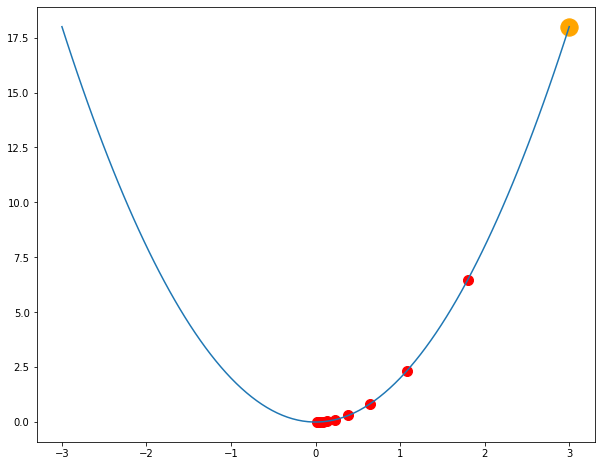

In [18]:
function_x = np.linspace(-3, 3, 100)
function_y = 2 * function_x ** 2

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(function_x, function_y)

x = 3
y = 2 * x **2
ax.scatter(x, y, color="orange", s=300)

lr = 0.1
for i in range(10):
    dy_dx = 4 * x
    x = x - lr * dy_dx
    y = 2*x ** 2

    ax.scatter(x, y, color="red", s=100)